# Decision Tree  - Malware Detection

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

In [2]:
dataset = pd.read_csv('Malware dataset.csv')
df = dataset.copy()
eda = dataset.copy()
df.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0


### EDA 

In [3]:
eda["classification"] = eda.classification.astype("category")
eda.describe()

,millisecond,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,task_size,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
count,100000.000000,1.000000e+05,100000.0,1.000000e+05,100000.000000,100000.0,100000.0,100000.0,100000.000000,100000.0,...,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.0,100000.0
mean,499.500000,1.577683e+05,0.0,3.069706e+09,18183.900070,0.0,0.0,0.0,15312.739510,0.0,...,32.991160,2.053130,117.920240,1.109190,3.204448e+09,385415.451970,4.059310,1.66142,0.0,0.0
std,288.676434,9.361726e+05,0.0,2.963061e+05,4609.792765,0.0,0.0,0.0,3256.475008,0.0,...,52.730176,13.881382,3.116892,2.160466,0.000000e+00,10144.036494,0.822848,3.26304,0.0,0.0
min,0.000000,0.000000e+00,0.0,3.069190e+09,13988.000000,0.0,0.0,0.0,9695.000000,0.0,...,0.000000,0.000000,112.000000,0.000000,3.204448e+09,371782.000000,3.000000,0.00000,0.0,0.0
25%,249.750000,0.000000e+00,0.0,3.069446e+09,14352.000000,0.0,0.0,0.0,12648.000000,0.0,...,1.000000,0.000000,114.000000,0.000000,3.204448e+09,378208.000000,3.000000,0.00000,0.0,0.0
50%,499.500000,0.000000e+00,0.0,3.069698e+09,16159.000000,0.0,0.0,0.0,15245.000000,0.0,...,9.000000,1.000000,120.000000,0.000000,3.204448e+09,383637.000000,4.000000,0.00000,0.0,0.0
75%,749.250000,4.096000e+03,0.0,3.069957e+09,22182.000000,0.0,0.0,0.0,17663.000000,0.0,...,46.000000,1.000000,120.000000,1.000000,3.204448e+09,390324.000000,5.000000,1.00000,0.0,0.0
max,999.000000,4.326605e+07,0.0,3.070222e+09,31855.000000,0.0,0.0,0.0,27157.000000,0.0,...,365.000000,256.000000,120.000000,18.000000,3.204448e+09,421913.000000,7.000000,15.00000,0.0,0.0


In [4]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 35 columns):
hash                 100000 non-null object
millisecond          100000 non-null int64
classification       100000 non-null category
state                100000 non-null int64
usage_counter        100000 non-null int64
prio                 100000 non-null int64
static_prio          100000 non-null int64
normal_prio          100000 non-null int64
policy               100000 non-null int64
vm_pgoff             100000 non-null int64
vm_truncate_count    100000 non-null int64
task_size            100000 non-null int64
cached_hole_size     100000 non-null int64
free_area_cache      100000 non-null int64
mm_users             100000 non-null int64
map_count            100000 non-null int64
hiwater_rss          100000 non-null int64
total_vm             100000 non-null int64
shared_vm            100000 non-null int64
exec_vm              100000 non-null int64
reserved_vm          10000

### Data Visualization using BiVariate Plots

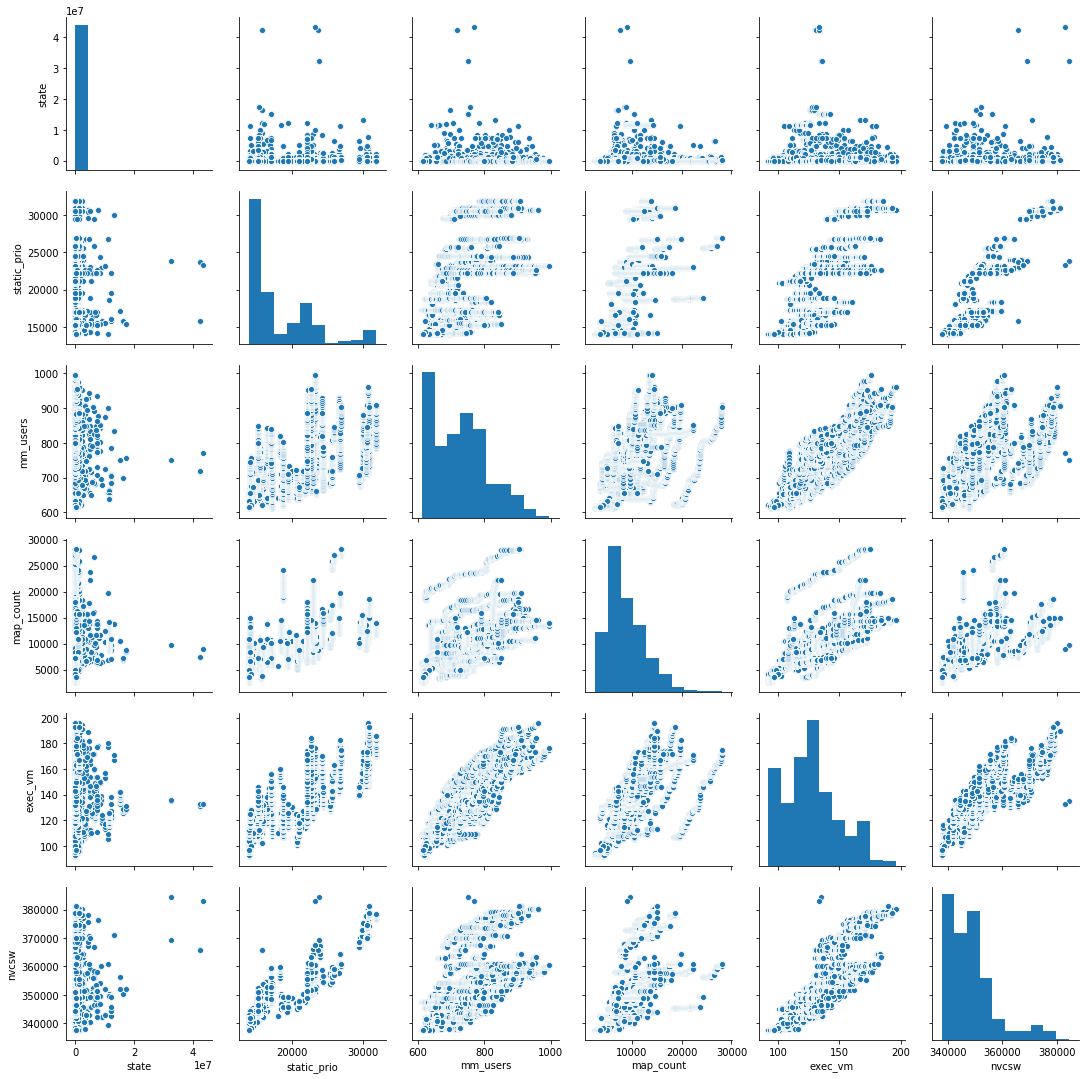

In [5]:
sns.pairplot(eda[["state","static_prio","mm_users","map_count","exec_vm","nvcsw","classification"]])

### Correlation Heatmap

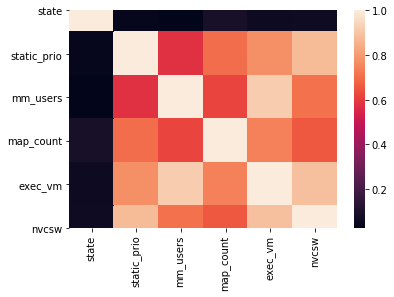

In [6]:
heat = eda[["state","static_prio","mm_users","map_count","exec_vm","nvcsw","classification"]]
sns.heatmap(heat.corr())

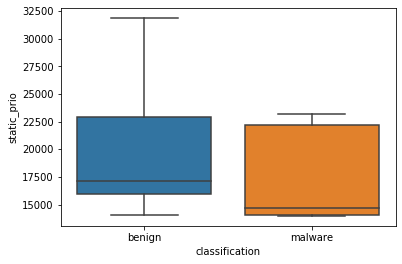

In [7]:
sns.boxplot(eda["classification"],eda["static_prio"])

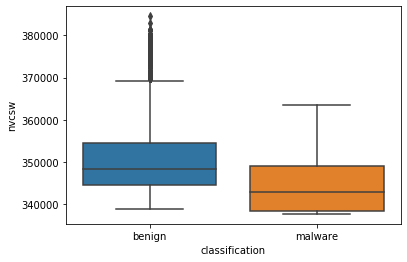

In [8]:
sns.boxplot(eda["classification"],eda["nvcsw"])

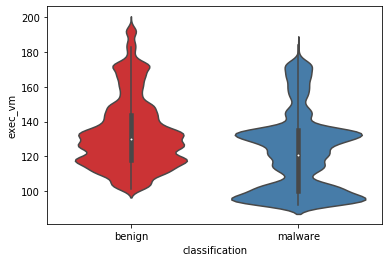

In [9]:
sns.violinplot(eda["classification"],eda["exec_vm"],palette="Set1")

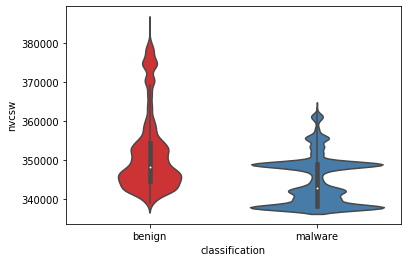

In [10]:
sns.violinplot(eda["classification"],eda["nvcsw"],palette="Set1")

## Data Preprocessing

In [11]:
from sklearn.preprocessing import LabelEncoder


X = df.drop(['classification','hash'],axis=1)
y = df["classification"]

le = LabelEncoder()
y = le.fit_transform(y)

### Split Data

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model building - Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='lbfgs',random_state = 0)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Making Predictions and Metrics

Training Acc: 94.06 %
Test Acc: 94.00800000000001 %

Confusion Matrix
[[11590   938]
 [  560 11912]]


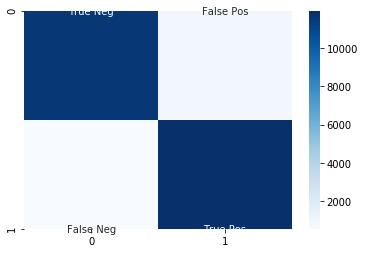

In [15]:
from sklearn.metrics import confusion_matrix

y_pred = log_reg.predict(X_test)
print("Training Acc:",log_reg.score(X_train, y_train)*100,"%")
print("Test Acc:",log_reg.score(X_test, y_test)*100,"%")


cf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix")
print(cf_matrix)
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
plt.show()


## Model building - Decision Tree Classifier

In [16]:
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import accuracy_score,f1_score

print('Accuracy :', round(accuracy_score(y_test, y_pred)*100,3),"%")
print('F1 score :', round(f1_score(y_test, y_pred)*100,3),"%")
print('Recall   :', round(recall_score(y_test, y_pred)*100,3),"%")
print('Precision:', round(precision_score(y_test, y_pred)*100,3),"%")

Accuracy : 94.008 %
F1 score : 94.084 %
Recall   : 95.51 %
Precision: 92.7 %


In [17]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Making Predictions and Metrics

Training Acc: 100.0 %
Test Acc: 99.996 %

Confusion Matrix
[[12528     0]
 [    1 12471]]


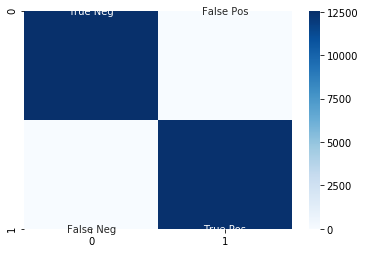

In [18]:
from sklearn.metrics import confusion_matrix

y_pred = tree.predict(X_test)
print("Training Acc:",tree.score(X_train, y_train)*100,"%")
print("Test Acc:",tree.score(X_test, y_test)*100,"%")


cf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix")
print(cf_matrix)
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
plt.show()


In [19]:
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import accuracy_score,f1_score

print('Accuracy :', round(accuracy_score(y_test, y_pred)*100,3),"%")
print('F1 score :', round(f1_score(y_test, y_pred)*100,3),"%")
print('Recall   :', round(recall_score(y_test, y_pred)*100,3),"%")
print('Precision:', round(precision_score(y_test, y_pred)*100,3),"%")

Accuracy : 99.996 %
F1 score : 99.996 %
Recall   : 99.992 %
Precision: 100.0 %
